# CSCI 3360 HW 1: Web Scraping

In this assignment, you will write python programs to scrape data from web pages. As we have seen in class, there are python packages that can help you achieve the goal:

- [`urllib2` ](https://docs.python.org/2/library/urllib2.html)
- [`requests`](http://docs.python-requests.org/en/master/api/)
- [`BeatifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- `lxml`

## Submission instruction
- Due by 11:59pm on **Feb. 6th, 2018**
- Complete this notebook and name it as "*CSCI3360\_HW1\_{your first name}.ipynb*".
- Do **not** use any other 3rd party libraries unless you are asked to do so.
- Do **not** _hardcode_ any data.
- Feel free to modify function prototype (i.e., you can add additional input parameters based on your needs)
- Feel free to define your own functions if needed.

Let's start by importing the required libraries.

In [59]:
%matplotlib inline

import urllib2
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import json

## Part 1. January Temperature in Watkinsville, GA

As a warm-up, let's write a python program that extracts daily temperature data for January from a website. Your instructor says that

> "This winter seems to be **much colder** than last year's".

However, in order to make this claim, we will need to find and analyze some data that supports our claim. 

The _College of Argricultural & Environmental Science_ at UGA maintains a website that reports daily

- min temperature (${}^\circ$F),
- max temperature (${}^\circ$F), and
- precipitation (in).

See the picture below:

<img src="http://cobweb.cs.uga.edu/~jwlee/teaching/csci3360/images/uga_weather.png" />

To visually check this website, open a web browser and enter the following URL:

[http://www.georgiaweather.net/index.php?variable=HI&site=WATUGA](http://www.georgiaweather.net/index.php?variable=HI&site=WATUGA).

Notice that the url contains a query string (a set of **key/value pairs** delimited by & symbols) sent by your web browser in the form of HTTP **GET** request. The last key & value pair "site=WATUGA" has been added to select a weather station in Watkinsville, GA, among many stations they have across Georgia.

- The start of query string is indicated with the question mark (?).
- The query string contains a (set of) key/value pair.
- The key/value pair has the form of `{parameter name}={parameter value}`.
- Each key/value pair is separated by an ampersand (&) symbol.

In this part, we will compare the January temperature in Watkinsville, GA, for 2018 with that for 2017.

### Q1. Write a python function that extracts daily min/max temperatures for the given period (30 pts).


In [60]:
def get_temperature(fromMonth, fromDay, fromYear, toMonth, toDay, toYear, station):
    """
    Parameters
    ------------
    fromMonth: string, month name (e.g., January, February, and so on)
    fromDay: an integer between 1 and 31
    fromYear: an integer between 1996 and 2018
    toMonth: string, month name
    toDay: an intesger between 1 and 31
    toYear: an integer between 1996 and 2018
    station: string, station name
    
    Return
    ------------
    df: DataFrame, each row contains date, min temperature, and max temperature.
    """
    target_url = "http://www.georgiaweather.net/index.php"
    
    ###########################################
    #        Your code goes here              #
    ###########################################   
    """ Precisely Finding out where is the data located"""
    """ Parsing HTML Pages for getting out data"""

    form_data = {
        'fromMonth': fromMonth, 
        'fromDay':fromDay, 
        'fromYear': fromYear, 
        'toMonth': toMonth, 
        'toDay' :toDay, 
        'toYear' :toYear, 
        'station' : station
    }
    
    result  = requests.post('http://www.georgiaweather.net/index.php?variable=HI&site=WATUGA', data= form_data)
    soup = BeautifulSoup (result.text, "lxml", from_encoding="utf-8")  
    weather_table = soup.find_all('table')[6]
    
    temperature_chart = weather_table
    data1 = {
           'Date':[],
           'Max Temperature[°F]':[],
           'Min Temperature[°F]':[],
           'Rain (in)':[]
    }

    for row in temperature_chart.find_all('tr'):
        cells = row.find_all('td')
        
        
        #skip the first row that consists of <th> tags
        if len(cells) == 0 :
            continue
            
        data1['Date'].append(cells[0].string)
        data1["Max Temperature[°F]"].append(cells[1].string)
        data1["Min Temperature[°F]"].append(cells[2].string)
        data1['Rain (in)'].append(cells[3].string)
        
    df = pd.DataFrame(data1)
    df2 = df.iloc[1:] 
    
    return df2

**Hint**: Identify the following lines from the page source code. 

```HTML
<form name = "test" action = "index.php?variable=HI&site=WATUGA" method = "POST">
	<!--Beginning of From Month drop down menu -->
	From: 
			<select name="fromMonth"><option value = January>January</option><option value = February>February</option><option value = March>March</option><option value = April>April</option><option value = May>May</option><option value = June>June</option><option value = July>July</option><option value = August>August</option><option value = September>September</option><option value = October>October</option>
```
The `action` attribute of `form` tag specifies the url of the page to which the form data is submitted. From above, we can see that it is submitted to [http://www.georgiaweather.net/index.php?variable=HI&site=WATUGA](http://www.georgiaweather.net/index.php?variable=HI&site=WATUGA).
To select the date, you need to send the following data to the server using an HTTP **POST** request.
- `fromMonth`
- `fromDay`
- `fromYear`
- `toMonth`
- `toDay`
- `toYear`

Once you pass the above information, the server will return an HTML table showing the daily temperatures for the specified time period. You can parse the table using the `BeautifulSoup` package.

Using the `get_temperature()` function we defined in above, retrieve the temperatures for Jan. 1 - 21, 2017 and Jan. 1 - 21, 2018.

In [79]:
# this cell should run without any error
jantemp2017 = get_temperature('January', 1, 2017, 'January', 21, 2017, 'WATUGA')
jantemp2018 = get_temperature('January', 1, 2018, 'January', 21, 2018, 'WATUGA')

print "This is the temperature for january 2017"
print jantemp2017
print  "      "
print "This is the temperature for january 2018"
print jantemp2018




This is the temperature for january 2017
      Date Max Temperature[°F] Min Temperature[°F] Rain (in)
1   Jan 01                47.9                40.1      0.71
2   Jan 02                57.1                47.7      1.86
3   Jan 03                63.2                52.9       0.1
4   Jan 04                54.4                38.7         0
5   Jan 05                57.5                29.4         0
6   Jan 06                46.9                35.1      0.59
7   Jan 07                  38                23.8      0.16
8   Jan 08                37.8                17.1         0
9   Jan 09                42.9                24.1         0
10  Jan 10                56.4                26.9         0
11  Jan 11                70.3                47.8         0
12  Jan 12                72.8                44.4         0
13  Jan 13                74.6                47.5         0
14  Jan 14                72.4                51.1         0
15  Jan 15                73.7              

### Q2. Compute the following statistics for both 2017 and 2018 (5 pts for each). 

1. the mean and median of min/max temperatures
2. the standard deviation of min/max temperatures
3. the maximum of max temperatures and the minimum of min temperatures

### Q3. Draw a line plot showing the trend of min January temperature. It should contain two lines, one for 2017 and the other for 2018 (10 pts).

In [80]:
######################################
#   Your code for the plot goes here #
######################################

"""  Q2 statistic for both 2017 and 2018"""

print 'for 2017'
print "  2017 mean"
print "  The mean max_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Max Temperature[°F]']).mean())
print "  The mean min_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Min Temperature[°F]']).mean())
print "  2017 median"
print "  The median max_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Max Temperature[°F]']).median())
print "  The median min_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Min Temperature[°F]']).median())
print "  2017 standard deviation"
print "  The standard deviation max_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Max Temperature[°F]']).std())
print "  The standard deviation min_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Min Temperature[°F]']).std())
print "  2017 max and min"
print "  The max of max_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Max Temperature[°F]']).max())
print "  The min of min_temperature of 2017 is {}".format(pd.to_numeric(jantemp2017['Min Temperature[°F]']).min())
print " "
print 'for 2018'
print '  2018 mean'
print "  The mean max_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Max Temperature[°F]']).mean())
print "  The mean min_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Min Temperature[°F]']).mean())
print '  2018 median'
print "  The median max_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Max Temperature[°F]']).median())
print "  The median min_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Min Temperature[°F]']).median())
print "  2018 standard deviation"
print "  The standard deviation max_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Max Temperature[°F]']).std())
print "  The standard deviation min_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Min Temperature[°F]']).std())
print "  2018 max and min"
print "  The max of max_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Max Temperature[°F]']).max())
print "  The min of min_temperature of 2018 is {}".format(pd.to_numeric(jantemp2018['Min Temperature[°F]']).min())

print "      "
print " Q3: Welcome to the line chart!!"





for 2017
  2017 mean
  The mean max_temperature of 2017 is 60.880952381
  The mean min_temperature of 2017 is 42.7714285714
  2017 median
  The median max_temperature of 2017 is 63.2
  The median min_temperature of 2017 is 47.5
  2017 standard deviation
  The standard deviation max_temperature of 2017 is 12.4347745877
  The standard deviation min_temperature of 2017 is 12.2259209411
  2017 max and min
  The max of max_temperature of 2017 is 74.6
  The min of min_temperature of 2017 is 17.1
 
for 2018
  2018 mean
  The mean max_temperature of 2018 is 46.8666666667
  The mean min_temperature of 2018 is 25.8952380952
  2018 median
  The median max_temperature of 2018 is 41.5
  The median min_temperature of 2018 is 23.1
  2018 standard deviation
  The standard deviation max_temperature of 2018 is 12.3678750533
  The standard deviation min_temperature of 2018 is 10.6080382819
  2018 max and min
  The max of max_temperature of 2018 is 69.4
  The min of min_temperature of 2018 is 12.7
      


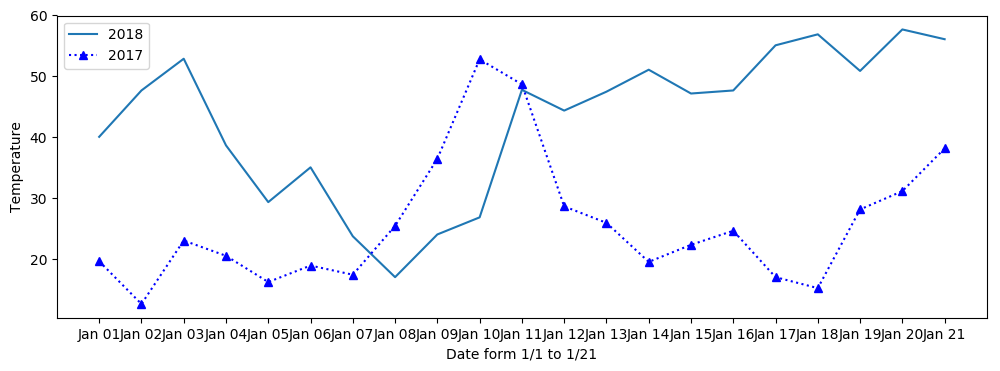

In [81]:
#using matplotlib to solve the line chart issue
import numpy as np
import matplotlib.pyplot as plt

a = pd.to_numeric(jantemp2017['Min Temperature[°F]']).values
b = pd.to_numeric(jantemp2018['Min Temperature[°F]']).values
# you can use the series directly to make a chart in pandas
getDate = jantemp2018['Date'].values
getDate1 = np.array(getDate)
c = np.array(a)
d = np.array(b)
# figure is figure object 
# ax is axes objects
fig, ax = plt.subplots(figsize=(12,4), dpi=100)
ax.plot(getDate1, c, label="2018")
ax.set_xlabel('Date form 1/1 to 1/21')
ax.set_ylabel('Temperature')

ax.plot(getDate1, d, 'b^:',label='2017')
ax.legend(loc ='upper left')

#now, I have to change the figure size in order to display all the date value
#using figsize to solve the issue. Done

check the source code of this website: 
http://georgiadogs.com/schedule.aspx?path=football
The website might store the data in a JASON format 
In this case, the data is not stored as <table> format
you might need to use get JSON function for helping you obtaining the data
you might need to use game-id to get the data
(The below content will give you the hint about how to do it
 

## Part 2. UGA Football Game Schedule

<img src="http://cobweb.cs.uga.edu/~jwlee/teaching/csci3360/images/uga_game_schedule.png" />

First, check this page [http://georgiadogs.com/schedule.aspx?path=football](http://georgiadogs.com/schedule.aspx?path=football) using your web browser. As shown in the above picture, the page shows the UGA football team's game schedule for 2017 - 2018 season.

For this part, you will write a python program that extracts the following information from the given web page.

- game date (string)
- opponent team name (string)
- game result (categorical, either 'W' or 'L')
- final score of UGA (integer)
- final score of the opponent (integer)
- score of each quarter (integer)
- location (string)
- attendance (integer)

All the fields you need to retrieve from the web page are marked in red in the picture above. In other words, your program should return a DataFrame, in which each row contains the information presented in above.

### Structure of the page

Unlike the weather website in Part 1, the information is presented in the form of HTML layers (`div` tag). The following code fragment will help you understand the structure of this web page.
```HTML
     <section aria-label="Games Schedule" class="sidearm-schedule-games" data-bind="stopBindings: true">
         <h3 class="hide">Scheduled Games</h3>
         <ul class="sidearm-schedule-games-container">
              <li class="sidearm-schedule-game sidearm-schedule-home-game sidearm-schedule-game-completed" data-bind='click: toggleGame' data-game-id="4858" aria-live="polite" aria-relevant="additions">
				<div class="sidearm-schedule-game-row flex flex-wrap flex-align-center row">    
                     <div class="sidearm-schedule-game-opponent flex flex-align-center x-large-5 medium-8 x-small-12 full columns">
              
                           <div class="sidearm-schedule-game-opponent-logo noprint">
                                <img class="lazy" data-original="/images/logos/Appalachian-State-University.png?width=80&height=80&mode=max" alt="Appalachian State University Logo">
                            </div>
                                
                            <div class="sidearm-schedule-game-opponent-details flex-item-1">
                                 <div class="flex flex-justify-between">
                                   <div class="sidearm-schedule-game-opponent-date flex-item-1">
                                      <span>Sep 2 (Sat)</span>
                                      <span>6:15 PM </span>
                                      <span class="hide-on-x-large">ESPN</span>
                                      <span class="hide-on-x-large">Bulldog Network</span>
                                   </div>
                                   <div class="sidearm-schedule-game-conference-conference flex flex-inline"></div>
                                 </div>           
                                 <div class="sidearm-schedule-game-opponent-text">
                                      <span class="sidearm-schedule-game-conference-vs flex flex-inline">
                                        <span class="sidearm-schedule-game-home">vs</span>
                                      </span>
                                      <span class="sidearm-schedule-game-opponent-name">
                                         <a href="http://www.appstatesports.com" target="_blank">Appalachian State</a>
                                      </span>
                                 </div>
                                 <div class="sidearm-schedule-game-links show-on-medium-only">
                                     <ul>
                                       <li><a href="/boxscore.aspx?id=4858&path=football" aria-label="Box score of Appalachian State on September 2 6:15 PM">Box Score</a></li>
                                       <li><a href="/news/2017/9/2/football-balanced-bulldogs-defeat-appalachian-state-31-10.aspx" aria-label="Recap of Appalachian State on September 2 6:15 PM">Recap</a></li>
                                       <li><a href="/documents/2017/9/2/UGA_vs_App_State_Final_Stats.pdf">Final Stats</a></li>
                                       <li><a href="/news/2017/9/2/football-georgia-vs-app-state-post-game-notes.aspx">Postgame Notes</a></li>
                                       <li><a href="/documents/2017/9/2/Pages_from_UGA_vs_ASU_Quotes.pdf">Postgame Quotes</a></li>
                                       <li><a href="/galleries?gallery=2923">Photos</a></li>
                                     </ul>
                                </div> 
                              </div>
                            </div>

```

### Getting the details of game statistics

When you click the plus (+) button at the lower right corner of each layer, the layers below the selected one will slide down to show the details fo the game. Internally, this triggers a javascript function call in which the browser retrieves a JSON object from the following URL: [http://georgiadogs.com/services/responsive-schedule.ashx](http://georgiadogs.com/services/responsive-schedule.ashx). In other words, the browser dynamically fetches the game statistics information from the web server whenever the user clicks the button.

FYI, the following lines of code do the job.
```javascript
var Game = function (id) {
                var self = this;

                self.isLoading = ko.observable(true);
                self.boxscore = ko.observable();
                self.story = ko.observable();

                $.getJSON('/services/responsive-schedule.ashx', { 'game_id': id }, function (response) {
                    self.boxscore(response.boxscore);
                    self.story(response.story);

                    if (self.story() && self.story().video) {
                        self.story().video = new ShowcasePlayer({ youtube: self.story().video.youtube, Archive: self.story().video.Archive });
                    }
                    self.isLoading(false);
                });

```
To get the details, you need to make an HTTP GET request to http://georgiadogs.com/services/responsive-schedule.ashx. This page takes the `game_id` as input and returns a JSON object. For example, to get the details of the game with Appalachian St., you need to set `game_id=4858`. You can find the `game_id` information from the `data-game-id` attribute of `<li>` tag. See the following picture.

<img src="http://cobweb.cs.uga.edu/~jwlee/teaching/csci3360/images/uga_game_details.png" />

Before implementing a function that fetches all the required fields, let's implement a function that retrieves a JSON object. For more information about handling JSON objects in python, see [here](https://docs.python.org/2/library/json.html).

### Q4. Complete the `get_game_details()` function (15 pts).

In [82]:
def get_game_details(page_url, game_id):
    """
    retrieves a JSON object from the given url
    
    Parameters
    ----------------
    page_url: url of the page that provides the service
              In this assignment, the value is fixed to "http://georgiadogs.com/services/responsive-schedule.ashx", 
              but for generality leave it as an input parameter.
    game_id: integer, game id
    
    Returns
    ----------------
    a json object
    """
    ################################
    #  Your code goes here         #
    ################################   
    #let's star over, specify the user agent for us to open the url
    # understand the structure of the page
    # finding out where is the data. If it is a json object, we need to discover the function for it
    # search the url and what's the variable to trigger the function 
    # Then, we could successfully retrieve the value
    url = page_url 
    headers = {"User-Agent":"Mozilla/5.0"}
    query = {'game_id': '4858'}
    res1 = requests.get(url, headers=headers,params=query)
    game_detail= bs4.BeautifulSoup(res1.text, 'lxml')
    
    
    
    
    return game_detail

In [71]:
  """ 
    Warning !!!! This part is not relevant to the HW.  
    
    
    url = 'http://georgiadogs.com/services/responsive-schedule.ashx?' 
    headers = {"User-Agent":"Mozilla/5.0"}
    query = {'game_id': "4858"}
    res1 = requests.get(url, headers=headers,params=query)
    game_detail= bs4.BeautifulSoup(res1.text, 'lxml')
    
    #learn how to get information from a jason object
    # parse the html file
    find = game_detail.p
    # extract the tag and get the value 
    findout = find.text.strip()
    # load the json file
    target= json.loads(findout)
    home = target['boxscore']['home']['score_by_periods']
    # get the location and attendence
    location = target['boxscore']['location']
    attendance = target['boxscore']['attendance']
    home_score = pd.DataFrame(home) 
    
    """------- Second Part """
    home_url = 'http://georgiadogs.com/schedule.aspx?path=football'
    home_header = {"User-Agent":"Mozilla/5.0"}
    home_res = requests.get(home_url, headers=home_header)
    home_detail= bs4.BeautifulSoup(home_res.text, 'lxml')
    opponent = home_detail.find('a', attrs={'href':'http://www.appstatesports.com'})
    
    # get the opponent name
    opponent_name = opponent.text
    
    # get the time for the game
    time_div = home_detail.find('div', attrs={'class':'sidearm-schedule-game-opponent-date flex-item-1'})
    time_box = time_div.find_all('span')
    time_box1 = time_box[0].text
    time_box2 = time_box[1].text
    
    # get the final score for the game
    final_sc = home_detail.find('div', attrs={'class':'sidearm-schedule-game-result text-italic'})
    final_sc1 = final_sc.find_all('span')
    final_data1 = final_sc1[1].text
    final_data2 = final_sc1[2].text
    
    """ Now, we need to create a dataframe in here show all the information"""
    location = target['boxscore']['location']
    attendence  =target['boxscore']['attendance']
    # get a list of score UGA got

    data ={
        "Date":[time_box1,time_box2],
        "Final Score":[final_data1,final_data2],
        "Opponent":[opponent_name],
        "Score(quarter)":[home]
    }
    
    time_st1 = time_box1.encode('utf8')
    time_st2 = time_box2.encode('utf8')
    time_st = time_st1 + time_st2
    
    data1 = {
        "Game": [time_st,location,attendance,
                     opponent_name,final_data1+final_data2],
        
    }

    df = pd.DataFrame(data1,index=['Date & Time','Location','Attendance','Opponent','Final_Score'])
    print df
    print home_score
    """
    

                            Game
Date & Time  Sep 2 (Sat)6:15 PM 
Location             Athens, Ga.
Attendance                 92746
Opponent       Appalachian State
Final_Score              W,31-10
  period score
0      1     7
1      2    14
2      3    10
3      4     0


### Q5. Implement a python program that collects all the fields marked in red in the above picture (30 pts).

In [97]:
def get_game_schedule():
    """
    retrieves the game information from the page, http://georgiadogs.com/schedule.aspx?path=football
    
    Returns
    --------------
    a DataFrame object
    """
    home_url = "http://georgiadogs.com/schedule.aspx?path=football"
    
    ################################
    #  Your code goes here         #
    ################################
    #The game detail only can give us the detailed score in quarter 
    #other than that we need to get directly from the page
    url = 'http://georgiadogs.com/services/responsive-schedule.ashx?' 
    headers = {"User-Agent":"Mozilla/5.0"}
    query = {'game_id': "4858"}
    res1 = requests.get(url, headers=headers,params=query)
    game_detail= bs4.BeautifulSoup(res1.text, 'lxml')
    
    #learn how to get information from a jason object
    # parse the html file
    find = game_detail.p
    # extract the tag and get the value 
    findout = find.text.strip()
    # load the json file
    target= json.loads(findout)
    home = target['boxscore']['home']['score_by_periods']
    # get the location and attendence
    location = target['boxscore']['location']
    attendance = target['boxscore']['attendance']
    home_score = pd.DataFrame(home) 
    
    """------- Second Part """
   
    home_header = {"User-Agent":"Mozilla/5.0"}
    home_res = requests.get(home_url, headers=home_header)
    home_detail= bs4.BeautifulSoup(home_res.text, 'lxml')
    opponent = home_detail.find('a', attrs={'href':'http://www.appstatesports.com'})
    
    # get the opponent name
    opponent_name = opponent.text
    
    # get the time for the game
    time_div = home_detail.find('div', attrs={'class':'sidearm-schedule-game-opponent-date flex-item-1'})
    time_box = time_div.find_all('span')
    time_box1 = time_box[0].text
    time_box2 = time_box[1].text
    
    # get the final score for the game
    final_sc = home_detail.find('div', attrs={'class':'sidearm-schedule-game-result text-italic'})
    final_sc1 = final_sc.find_all('span')
    final_data1 = final_sc1[1].text
    final_data2 = final_sc1[2].text
    
    """ Now, we need to create a dataframe in here show all the information"""
    location = target['boxscore']['location']
    attendence  =target['boxscore']['attendance']
    # get a list of score UGA got

    time_st1 = time_box1.encode('utf8')
    time_st2 = time_box2.encode('utf8')
    time_st = time_st1 + time_st2
    
    data1 = {
        "Game": [time_st,location,attendance,
                     opponent_name,final_data1+final_data2,home_score['score'][0],home_score['score'][1],home_score['score'][2],home_score['score'][3]],
        
    }

    df = pd.DataFrame(data1,index=['Date & Time','Location','Attendance','Opponent','Final_Score',"Quarter1","Quarter2","Quarter3","Quarter4"])
    return df 


game_schedule2017 = get_game_schedule()    
print game_schedule2017

                            Game
Date & Time  Sep 2 (Sat)6:15 PM 
Location             Athens, Ga.
Attendance                 92746
Opponent       Appalachian State
Final_Score              W,31-10
Quarter1                       7
Quarter2                      14
Quarter3                      10
Quarter4                       0


### Q6. Draw a bar chart showing the average scores earned in each quarter. There should be 4 bars corresponding to each quarter and y-axis should correspond to average scores (5 pts).

### Q7. Add a categorical variable to your DataFrame, `game_schedule2017`, that takes the value of 'H' if it was a home game and 'A' if it was an away game, and write a program that generates the following table (5 pts).

|  | Total score earned |
|:---:|------------:|
| H |              |
| A |              |



<Container object of 4 artists>

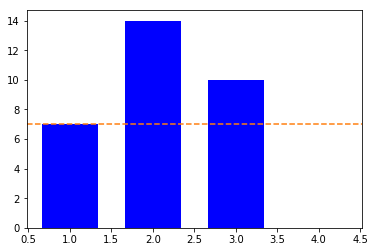

In [112]:
################################
#  Your code goes here         #
################################

""" Question 6"""
total_sc = 0
list_sc = []
# Draw a bar chart
for a in range(0,4):
    b = int(home[a]['score'])
    list_sc.append(b)
    total_sc +=b
    
avg_src = total_sc/4
x= [1,2,3,4]
#now we have a list of x, avg score, total_sc, 
width = 1/1.5

p = avg_src
# horizontal line indicating the threshold
plt.axhline(p, c='C1', ls='--', label='Average Score')
plt.bar(x,list_sc, width, color='blue')




    

In [98]:
"""Question7"""

def get_final_score(id):
    url = 'http://georgiadogs.com/services/responsive-schedule.ashx?' 
    headers = {"User-Agent":"Mozilla/5.0"}
    query = {'game_id': id}
    res1 = requests.get(url, headers=headers,params=query)
    game_detail= bs4.BeautifulSoup(res1.text, 'lxml')

    #learn how to get information from a jason object
    # parse the html file
    find = game_detail.p
    # extract the tag and get the value 
    findout = find.text.strip()
    # load the json file
    target= json.loads(findout)
    f_score = target['boxscore']['home']['score']
    return f_score

trail1 = home_detail.find('div', attrs={'class':'sidearm-schedule-game-opponent-text'})
#print trail1

# The length is 17 
trail2 = home_detail.find_all(attrs = {'aria-live':"polite"})
# beautiful soup works 
# create an empty array to store the game_id number
game_id = []
game_info = {
    'Home_game':[],
    'Away_game':[]   
}

unique_number =1
for number in range(15):
    if trail2[number].attrs['class'][1] == 'sidearm-schedule-home-game':
        the_score = get_final_score(trail2[number].attrs['data-game-id'])
        #game_info['Home_game'].append(trail2[number].attrs['data-game-id'])
        game_info['Home_game'].append(the_score)
    else:
        the_score = get_final_score(trail2[number].attrs['data-game-id'])
        #game_info['Home_game'].append(trail2[number].attrs['data-game-id'])
        game_info['Away_game'].append(the_score)
        
   
    

home_n = 0
away_n = 0
for n in range(len(game_info['Home_game'])):
    a= int(game_info['Home_game'][n].encode())
    home_n = home_n + a

for n in range(len(game_info['Away_game'])):
    a= int(game_info['Away_game'][n].encode())
    away_n = away_n + a
    

total_data = [home_n, away_n]
df_total = pd.DataFrame(total_data, columns =['Total score earned'], index=['Home','Away'])

print df_total




      Total score earned
Home                 223
Away                 165


### Q8. Compute the probability of winning in a home game  and that in an away game, i.e., $\mathbb{P}(\text{Win}~\vert~\text{home game})$ and $\mathbb{P}(\text{Win}~\vert~\text{away game})$, respectively. Draw two pie charts that visualize these probabilities (5 pts).

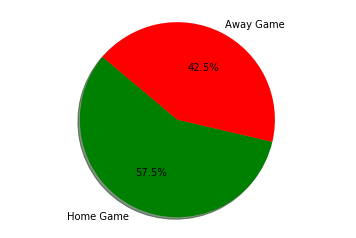

In [99]:
# This requires you to calculate how many times we won and how many times we lose
# Then, we could know the precise probabilities
# Working it tonight
total_n = home_n + away_n 
prob_home = home_n / float(total_n)
prob_away = away_n / float(total_n)

labels = 'Home Game','Away Game'
sizes = [prob_home, prob_away]
colors =['green','red']

plt.pie(sizes, labels = labels, colors = colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

